<a href="https://colab.research.google.com/github/LCherop/EEG-based-Classification-of-Behavioural-Symptoms-of-Depression/blob/main/Analysis_and_Classification_of_Behavioural_Symptoms_of_Depression_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb

## Grab the dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/EEG.machinelearing_data_BRMH.csv')
data.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [4]:
data.shape

(945, 1149)

In [7]:
data.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


## Prepare the dataset

### Remove unnecesary columns

In [6]:
columns_not_needed = ['no.','sex','age','eeg.date','education','IQ']

In [8]:
data.drop(columns_not_needed,axis=1,inplace=True)
data.head()

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [9]:
data.rename(columns = {'main.disorder':'main_disorder'}, inplace = True)
data.rename(columns = {'specific.disorder':'specific_disoder'}, inplace = True)

In [12]:
main_disorders = list(data.main_disorder.unique())
main_disorders

['Addictive disorder',
 'Trauma and stress related disorder',
 'Mood disorder',
 'Healthy control',
 'Obsessive compulsive disorder',
 'Schizophrenia',
 'Anxiety disorder']

In [13]:
specific_disoders = list(data.specific_disoder.unique())
specific_disoders

['Alcohol use disorder',
 'Acute stress disorder',
 'Depressive disorder',
 'Healthy control',
 'Behavioral addiction disorder',
 'Obsessive compulsitve disorder',
 'Schizophrenia',
 'Panic disorder',
 'Social anxiety disorder',
 'Posttraumatic stress disorder',
 'Adjustment disorder',
 'Bipolar disorder']

### Check and remove null values

In [23]:
features_with_null=list(data.columns[data.isna().any()])
len(features_with_null)

0

In [15]:
data.drop(features_with_null,axis=1,inplace=True)
data.shape

(945, 1142)

### Obtaining data on mood disorders and depression

In [16]:
data.head()

,main_disorder,specific_disoder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [18]:
mood_data = data.loc[data['main_disorder'] == 'Mood disorder']
mood_data.head()

,main_disorder,specific_disoder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,Mood disorder,Depressive disorder,12.159137,13.113503,9.031007,14.879389,15.834830,19.595759,11.605911,6.084709,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,Mood disorder,Depressive disorder,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,Mood disorder,Depressive disorder,16.573145,15.586708,14.094928,12.660197,12.979617,10.611797,8.802664,7.509552,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,Mood disorder,Depressive disorder,26.650019,22.823161,17.942133,17.148214,15.338128,14.571966,7.983127,28.158009,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,Mood disorder,Depressive disorder,14.624474,14.277301,11.099375,16.047926,17.851932,17.165379,11.682990,6.193040,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969


In [19]:
#Identify how many specific disorders are under mood disorder
specific_mood_disoders = list(mood_data.specific_disoder.unique())
specific_mood_disoders

['Depressive disorder', 'Bipolar disorder']

In [20]:
mood_data.shape

(266, 1142)

### Encode the dataset

In [27]:
from sklearn import preprocessing

In [24]:
le = preprocessing.LabelEncoder()
specific_disorder_encoded = le.fit_transform(mood_data['specific_disoder'])

In [25]:
specific_disorder_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [29]:
mood_data.head()

,main_disorder,specific_disoder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
89,Mood disorder,Depressive disorder,12.159137,13.113503,9.031007,14.879389,15.834830,19.595759,11.605911,6.084709,...,65.408894,59.590594,77.310851,75.280467,57.311188,48.015594,59.579033,68.503920,82.885151,86.986191
90,Mood disorder,Depressive disorder,12.404484,9.737819,13.925651,12.325169,15.130696,10.292518,10.263299,11.451697,...,84.366954,53.402639,60.535899,73.838548,72.298636,43.330485,71.298037,23.109295,62.098128,67.749204
91,Mood disorder,Depressive disorder,16.573145,15.586708,14.094928,12.660197,12.979617,10.611797,8.802664,7.509552,...,62.681353,20.062716,36.041763,36.436509,47.491240,20.875426,53.747615,8.009907,50.202188,33.647889
92,Mood disorder,Depressive disorder,26.650019,22.823161,17.942133,17.148214,15.338128,14.571966,7.983127,28.158009,...,86.582363,83.045735,85.752150,85.875624,86.286859,79.520327,84.541455,82.452224,86.950905,87.384296
93,Mood disorder,Depressive disorder,14.624474,14.277301,11.099375,16.047926,17.851932,17.165379,11.682990,6.193040,...,85.309981,58.218838,61.211830,65.038486,76.899037,49.849540,71.791429,39.910653,82.739819,62.285969


### Standardize the dataset

In [ ]:
non_features = ['main_disorder','specific_disoder']
mood_data.drop(non_features,axis=1,inplace= True)

In [35]:
features = mood_data.to_numpy()

In [37]:
#Specifying the target
y = specific_disorder_encoded
#Specify the features
X = preprocessing.StandardScaler().fit_transform(features)

## Classification

### Splitting the data

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

### Building the KNN Classifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 7)

In [51]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [52]:
y_pred = knn_model.predict(X_test)

## Model Evaluation

In [43]:
from sklearn import metrics

In [45]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 3")

Accuracy is 0.6  when k = 3


In [49]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5")

Accuracy is 0.7375  when k = 5


In [53]:
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 7")

Accuracy is 0.7625  when k = 7


In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
print(confusion_matrix(y_test,y_pred))

[[ 3 10]
 [ 9 58]]


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.23      0.24        13
           1       0.85      0.87      0.86        67

    accuracy                           0.76        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.75      0.76      0.76        80



## Feature Extraction and Normalisation

To increase model accuracy, feature extraction is performed


Independent Component Analysis (ICA)

In [84]:
#FE using ICA
from sklearn.decomposition import FastICA

ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)

In [85]:
knn_model.fit(X_ica,y)

KNeighborsClassifier(n_neighbors=7)

In [86]:
y_pred_ica = knn_model.predict(X_ica)

In [87]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_ica)," when ICA is used")

Accuracy is 0.7518796992481203  when ICA is used


In [88]:
print(classification_report(y,y_pred_ica))

              precision    recall  f1-score   support

           0       0.52      0.18      0.27        67
           1       0.77      0.94      0.85       199

    accuracy                           0.75       266
   macro avg       0.65      0.56      0.56       266
weighted avg       0.71      0.75      0.70       266



Principle Component Analysis

In [101]:
#FE using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [102]:
X_pca.shape

(266, 2)

In [112]:
knn_model.fit(X_pca,y)

KNeighborsClassifier(n_neighbors=7)

In [113]:
y_pred_pca = knn_model.predict(X_pca)

In [114]:
print("Accuracy is",metrics.accuracy_score(y,y_pred_pca)," when PCA is used")

Accuracy is 0.7819548872180451  when PCA is used


In [103]:
target_df = pd.DataFrame(specific_disorder_encoded,columns =['real_y'])


In [104]:
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1','PC2'])


In [105]:
PCA_df = pd.concat([PCA_df,target_df['real_y']],axis =1)
PCA_df.head()

,PC1,PC2,real_y
0,-9.721856,12.501211,1
1,-17.235572,7.185591,1
2,-22.115862,-8.824621,1
3,29.998343,6.208243,1
4,10.752183,-16.715994,1


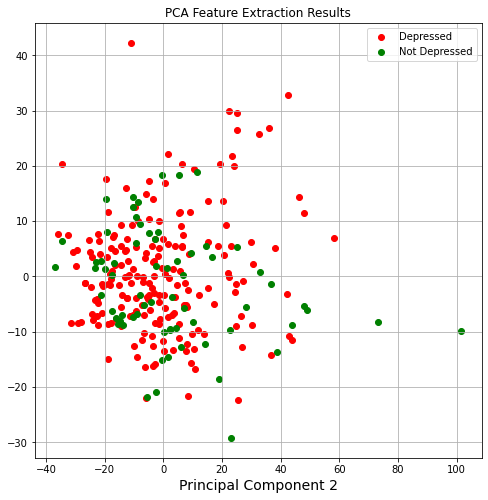

In [110]:
figure(num=None,figsize=(8,8),facecolor ='w',edgecolor='k')

moods = [1,0]
colors = ['r','g']

for mood, color in zip(moods,colors):
  plt.scatter(PCA_df.loc[PCA_df['real_y'] == mood, 'PC1'],
              PCA_df.loc[PCA_df['real_y'] == mood, 'PC2'],
              c = color)

plt.xlabel('Principal Component 1', fontsize = 14)
plt.xlabel('Principal Component 2', fontsize = 14)
plt.title('PCA Feature Extraction Results')
plt.legend(['Depressed','Not Depressed'])
plt.grid()